In [1]:
# importing libraries 

import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading Dataset 

dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# dimensions 

print(f"Dimensions of diabetes data {dataframe.shape}")

Dimensions of diabetes data (699, 9)


<AxesSubplot: >

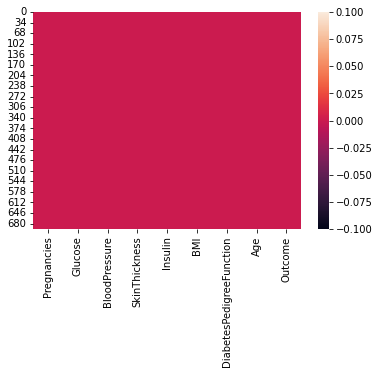

In [4]:
# Checking missing data ( by ploting heatmap )

sns.heatmap(dataframe.isnull())

<AxesSubplot: >

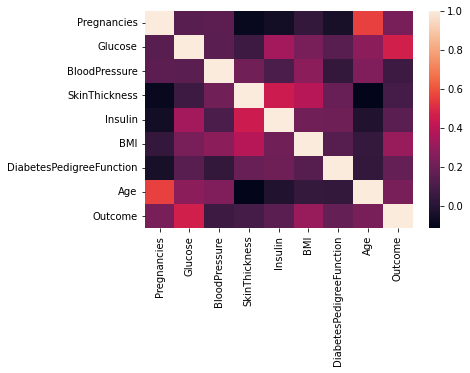

In [5]:
# co - relation matrix ( to check whether to which column outcome column dependent )

correlation = dataframe.corr()
sns.heatmap(correlation)

# from the plot we can conclude that outcome variable is heavily dependent on glucose column abnd 
# least dependent on blood pressure column

In [6]:
# Splitting dataframe into train( 80% ) and test( 20% )

X = dataframe.drop("Outcome", axis= 1)  # independent variables 
Y = dataframe["Outcome"]                # dependent variable


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
# Training model 
model_L = LogisticRegression()
model_L.fit(X_train, Y_train)

# checking accuracy 

print(f"accuracy on training set : {model_L.score(X_train, Y_train)}")
print(f"accuracy on test set : {model_L.score(X_test, Y_test)}")

accuracy on training set : 0.778175313059034
accuracy on test set : 0.7714285714285715


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Training model 
model_T = DecisionTreeClassifier(random_state = 0)
model_T.fit(X_train, Y_train)

# checking accuracy 
print(f"accuracy of training set :{model_T.score(X_train, Y_train)}")
print(f"accuracy of test set : {model_T.score(X_test, Y_test)}")


"""
    accuracy of training set is 100% while accuracy of test set is 72%
    this indicates that tree is overfitting and not generalizing well to new data
    
    we will check again by doing max_depth = 3 (prepruning)
"""


model_T2 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model_T2.fit(X_train, Y_train)

print(f"accuracy of training set :{model_T2.score(X_train, Y_train)}")
print(f"accuracy of test set : {model_T2.score(X_test, Y_test)}")

accuracy of training set :1.0
accuracy of test set : 0.6857142857142857
accuracy of training set :0.7817531305903399
accuracy of test set : 0.7785714285714286
